## Heart Attack Analysis

Dalam Notebook ini, saya akan meng-analisis tentang Serangan Jantung yang kerap kali mematikan bagi kehidupan manusia, tentunya dengan menggunakan dataset yang sudah di record oleh para pasien yang mengalami serangan jantung atau tidak. Sehingga dalam analysis ini akan menggunakan metode Classification untuk bisa memprediksi apakah seorang pasien mempunyai risiko yang tinggi untuk mengalami serangan jantung.

Tentunya kita mengetahui bahwa Serangan Jantung adalah momok yang menakutkan bagi manusia. Hal ini dikarenakan mempunyai rating tinggi yang menyebabkan kematian.

About this dataset

1) Age : Age of the patient

2) Sex : Sex of the patient

3) exang: exercise induced angina (1 = yes; 0 = no)

4) ca: number of major vessels (0-3)

5) cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic

6) trtbps : resting blood pressure (in mm Hg)

7) chol : cholestoral in mg/dl fetched via BMI sensor

8) fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

9) rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

10) thalach : maximum heart rate achieved

11) target : 0= less chance of heart attack 1= more chance of heart attack

## Data Pre-Processing

In [2]:
#import library
import numpy as np
import pandas as pd #dataframe operation
import matplotlib.pyplot as plt #visualisasi
import seaborn as sns #visualisasi
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [3]:
# Import dataset dan lihat apakah dataset berjalan
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Melihat info sekilas dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# Melihat statistik deksripti dari dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
def summary_table(df): #function to create an added information regarding the dataset
    summary = pd.DataFrame(dict(dataFeatures = df.columns,
                                  dataType = df.dtypes, #display datatype
                                  null = df.isna().sum(), #sum of null values
                                  null_percentage = round(df.isna().sum() / len(df) *100,2),#how many percente null values
                                  unique = df.nunique(),  #cek for number of unique values
                                  uniqueSample = [list(df[i].sample(3).drop_duplicates()) for i in df.columns] #3 random samples
                               )
                           ).reset_index(drop=True)
    summary['unique_percentage'] = round(summary['unique'] / len(df) *100,2) #convert unique to percentage values
    return summary

In [7]:
# Melihat summary dataset dari missing value, nilai unique
summary_table(df)

,dataFeatures,dataType,null,null_percentage,unique,uniqueSample,unique_percentage
0,age,int64,0,0.0,41,"[46, 47, 45]",13.53
1,sex,int64,0,0.0,2,"[1, 0]",0.66
2,cp,int64,0,0.0,4,"[0, 2]",1.32
3,trtbps,int64,0,0.0,49,"[140, 148]",16.17
4,chol,int64,0,0.0,152,"[226, 250, 249]",50.17
5,fbs,int64,0,0.0,2,[0],0.66
6,restecg,int64,0,0.0,3,"[1, 0]",0.99
7,thalachh,int64,0,0.0,91,"[169, 202, 126]",30.03
8,exng,int64,0,0.0,2,"[1, 0]",0.66
9,oldpeak,float64,0,0.0,40,"[0.4, 0.0, 0.3]",13.20


In [ ]:
binary_col = ['sex', 'cp', 'fbs', 'exng', 'restecg', 'slp','thall']

continu_col = ['age', 'chol', 'thalachh']

ordinal_col = ['caa']

In [8]:
df.corr()['output'].sort_values(ascending=False)

output      1.000000
cp          0.433798
thalachh    0.421741
slp         0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trtbps     -0.144931
age        -0.225439
sex        -0.280937
thall      -0.344029
caa        -0.391724
oldpeak    -0.430696
exng       -0.436757
Name: output, dtype: float64

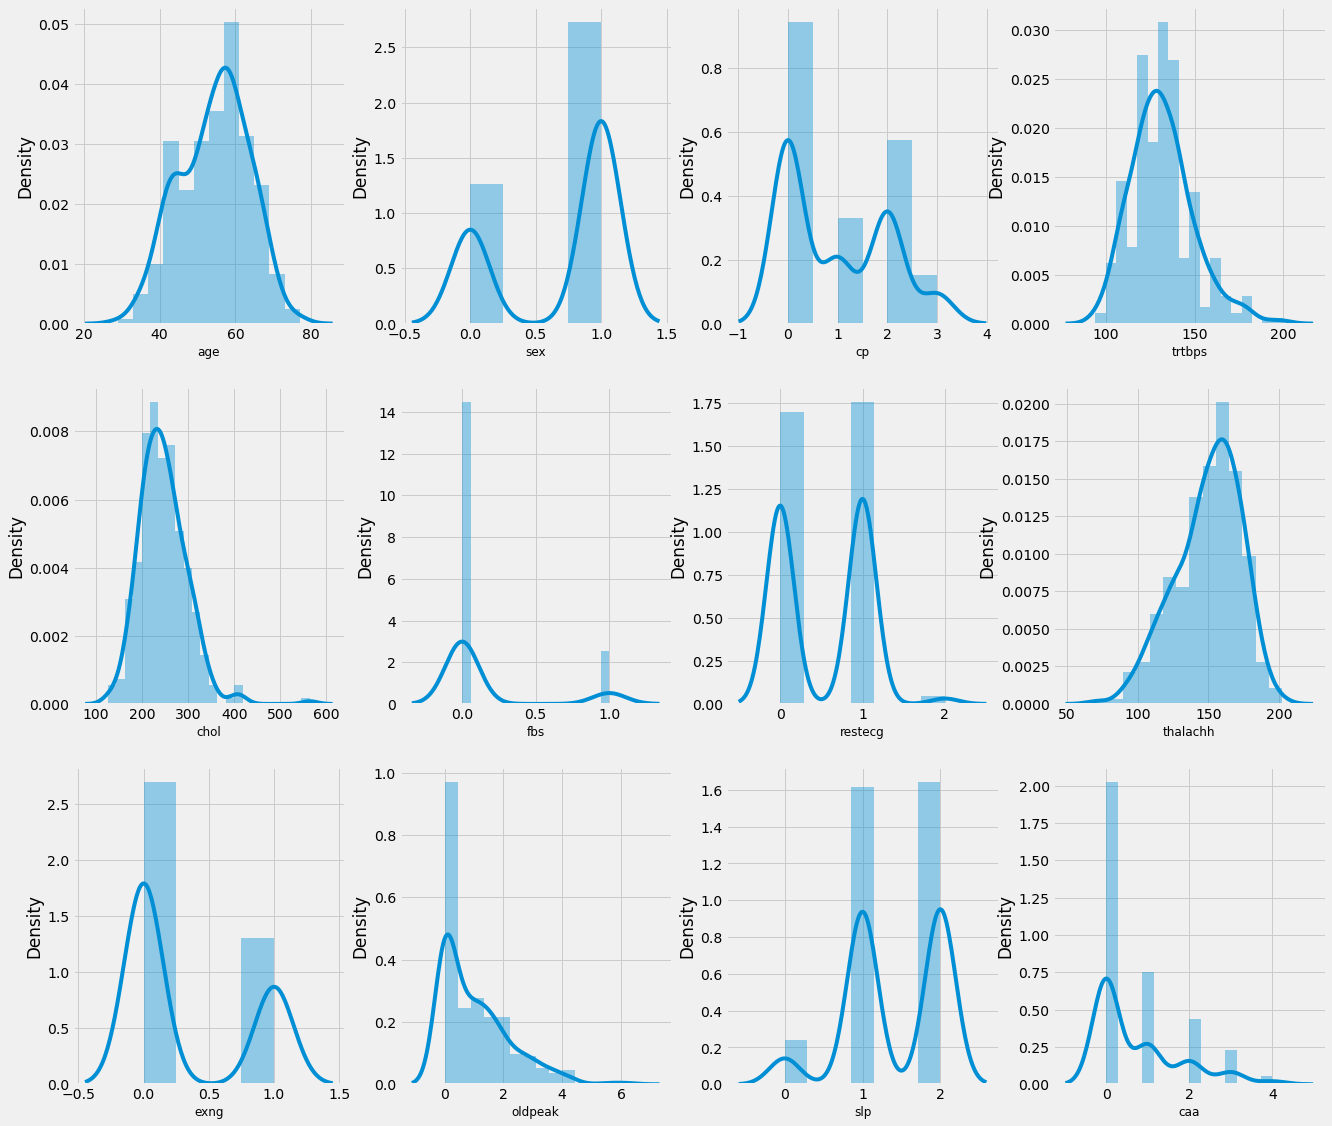

In [9]:
# Melihat distribusi normal dari dataset
plt.figure(figsize = (20, 25))
feature_num = 1
for i in df:
    if feature_num < 13:
        ax = plt.subplot(4, 4, feature_num)
        sns.distplot(df[i])
        plt.xlabel(i, fontsize = 12)
        
    feature_num += 1
plt.show()

In [10]:
# Scaling dataset menggunakan Standard Scaler
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
y = df['output']
df_scaled = ss.fit_transform(df.drop(('output'),axis=1))
df_scaled = pd.DataFrame(data=df_scaled,columns=df.columns[:-1])
df_scaled = pd.concat([df_scaled,y],axis=1)

In [11]:
df_scaled

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,1
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,1
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,1
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,1
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.724323,-0.649113,-0.714429,1.123029,0
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,0.138373,-0.649113,-0.714429,1.123029,0
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,2.036303,-0.649113,1.244593,1.123029,0
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.138373,-0.649113,0.265082,1.123029,0


In [12]:
df = df_scaled

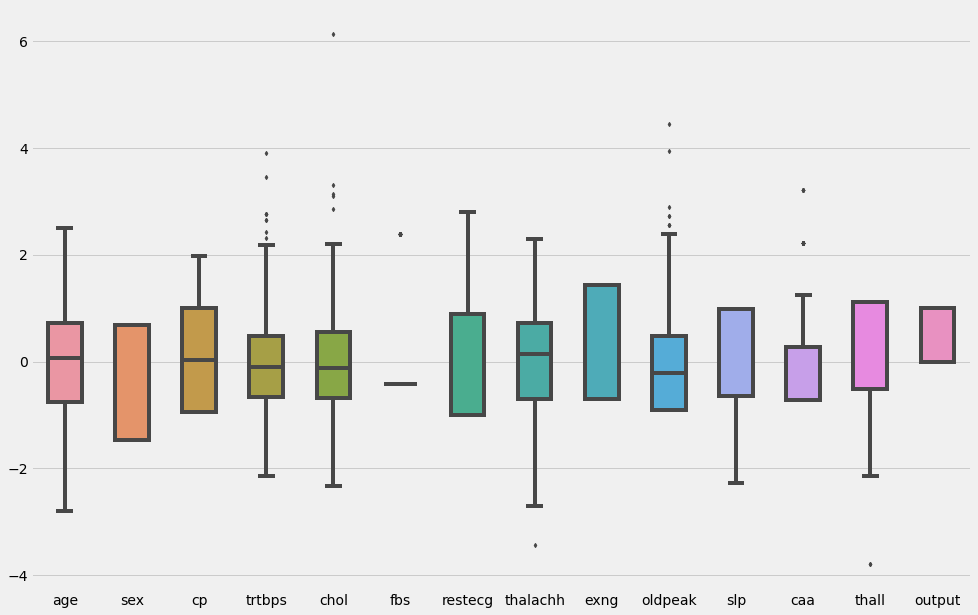

In [13]:
# Melihat apakah ada outlier dalam dataset tiap kolom
fig, ax = plt.subplots(figsize = (15, 10))
sns.boxplot(data = df, width = 0.5, ax = ax, fliersize = 3)
plt.show()

In [14]:
# Handling Outlier dengan menggunakan IQR
import scipy.stats as st
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR=Q3-Q1
df_clean=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

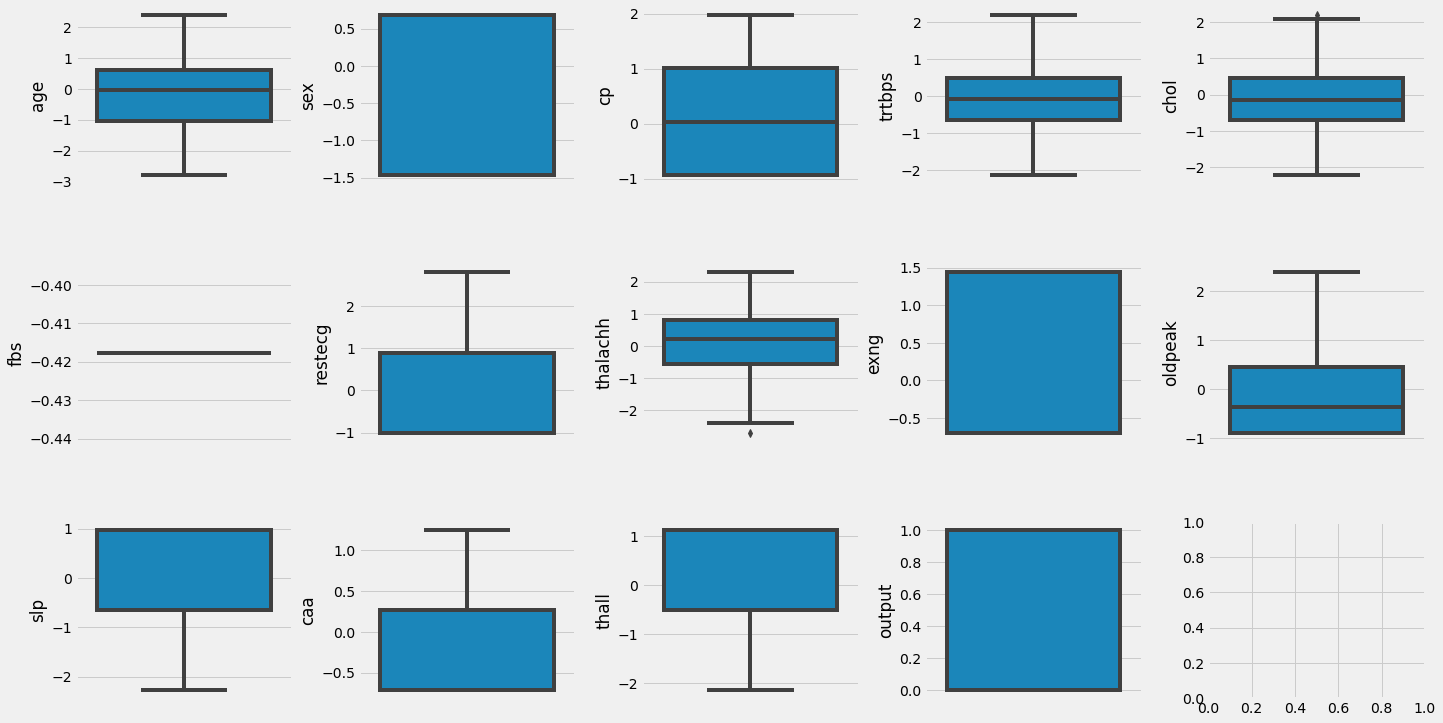

In [15]:
# Melihat kembali outlier
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in df_clean.items():
    sns.boxplot(y=k, data=df_clean, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [16]:
df = df_clean

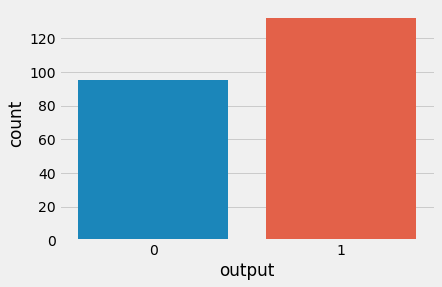

In [17]:
# Melihat kolom label, 0 = tidak, 1 = ya
sns.countplot(x='output' , data = df)

Dari hasil label dapat dilihat bahwa terjadi imbalanced antara yang mengalami serangan jantung dan yang tidak, namun disini yang mengalami serangan jantung lebih tinggi daripada yang tidak. Untuk itu, selanjutnya data akan di seimbangkan menggunakan SMOTE

## Data Modelling

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

In [19]:
X = df.drop(columns='output')
y = df['output']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [21]:
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
sm = SMOTE(random_state = 5) 
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train) #transform to SM (SMOTE)
 
print('After OverSampling, the shape of x1_train_sm: {}'.format(X_train_sm.shape)) 
print('After OverSampling, the shape of y1_train_sm: {} \n'.format(y_train_sm.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_sm == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_sm == 0)))

Before OverSampling, counts of label '1': 98
Before OverSampling, counts of label '0': 72 

After OverSampling, the shape of x1_train_sm: (196, 13)
After OverSampling, the shape of y1_train_sm: (196,) 

After OverSampling, counts of label '1': 98
After OverSampling, counts of label '0': 98


In [22]:
X_train

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
46,-1.143291,0.681005,1.002577,0.478391,-0.217683,-0.417635,-1.005832,1.327358,-0.696631,-0.896862,0.976352,-0.714429,-0.512922
31,1.172774,0.681005,-0.938515,-0.663867,-1.338561,-0.417635,0.898962,-0.421862,-0.696631,-0.551783,0.976352,-0.714429,1.123029
80,-1.474158,0.681005,1.002577,-1.120770,0.072199,-0.417635,0.898962,1.283627,-0.696631,-0.896862,0.976352,-0.714429,-0.512922
237,0.621330,0.681005,-0.938515,0.478391,0.903195,-0.417635,-1.005832,0.890053,-0.696631,0.138373,-0.649113,1.244593,1.123029
258,0.841908,-1.468418,-0.938515,1.049520,-0.043753,-0.417635,0.898962,0.190365,1.435481,0.310912,-0.649113,-0.714429,-0.512922
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,-1.474158,-1.468418,0.032031,-0.321189,1.154427,-0.417635,0.898962,0.583939,-0.696631,-0.896862,0.976352,-0.714429,-0.512922
17,1.283063,-1.468418,1.973123,1.049520,-0.391612,-0.417635,0.898962,-1.558855,-0.696631,1.346147,-2.274579,-0.714429,-0.512922
120,1.062485,-1.468418,-0.938515,-0.092738,1.096450,-0.417635,0.898962,-1.209011,-0.696631,0.828529,-0.649113,1.244593,-0.512922
230,-0.812425,0.681005,1.002577,-1.349222,-0.063079,-0.417635,0.898962,0.102904,-0.696631,-0.896862,0.976352,-0.714429,-0.512922


Dalam Classfication ini saya akan berfokus pada **False Negative**(Memprediksikan nilai tidak namun dalam Actualnya bernilai ya), hal ini dikarenakan bila Model memprediksi False Negative dengan akurasi yang rendah tentunya akan berbahaya bagi pasien. Untuk itu, difokuskan di **False Negative**, **Recall 1**, dan **Precision 0**

### XGBOOST Classifier

In [55]:
from xgboost import XGBRFClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix, roc_auc_score

In [25]:
xgb_fit = XGBRFClassifier(random_state=42).fit(X_train_sm, y_train_sm)

pred_xgb = xgb_fit.predict(X_test)

[18:59:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


              precision    recall  f1-score   support

           0       0.91      0.91      0.91        23
           1       0.94      0.94      0.94        34

    accuracy                           0.93        57
   macro avg       0.93      0.93      0.93        57
weighted avg       0.93      0.93      0.93        57



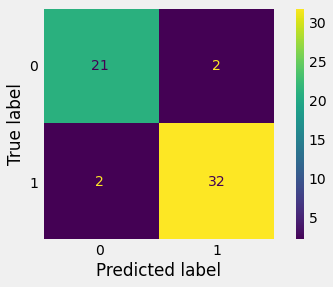

In [26]:
print(classification_report(y_test, pred_xgb))

plot_confusion_matrix(estimator=xgb_fit, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

Dari model XGBOOST ini **False Negative** nya sangat baik dengan **Recall 1** mencapai 0.94 dan **Precision 0** 0.91

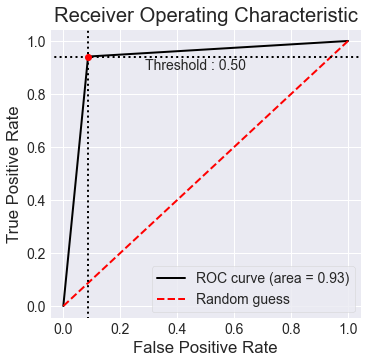

In [38]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, pred_xgb, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [27]:
# What features contribute the most?
features_importances = pd.DataFrame({'Features': X_train.columns, 
                                     'Score':xgb_fit.feature_importances_}).sort_values(by ='Score', 
                                                                                                   ascending = False)
features_importances.head()

,Features,Score
11,caa,0.284749
12,thall,0.245044
2,cp,0.092637
9,oldpeak,0.064443
1,sex,0.060344


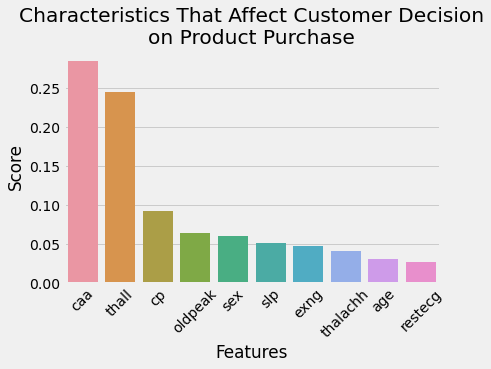

In [28]:
sns.barplot(x = 'Features', y ='Score', data = features_importances[:10]);
plt.xticks(rotation = 45)
plt.title('Characteristics That Affect Customer Decision\non Product Purchase');

In [30]:
# import models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [31]:
# models
rf = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
nb = GaussianNB()

In [32]:
# modeling
models = [rf, svm, lr, dt, knn, nb]

for model in models:
    model.fit(X_train_sm, y_train_sm)

In [33]:
# Evaluation
ypred_rf = rf.predict(X_test)
ypred_svm = svm.predict(X_test)
ypred_lr = lr.predict(X_test)
ypred_dt = dt.predict(X_test)
ypred_knn = knn.predict(X_test)
ypred_nb = nb.predict(X_test)

### Random Forest Classifier

              precision    recall  f1-score   support

           0       0.84      0.91      0.87        23
           1       0.94      0.88      0.91        34

    accuracy                           0.89        57
   macro avg       0.89      0.90      0.89        57
weighted avg       0.90      0.89      0.90        57



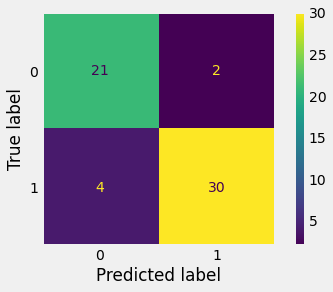

In [34]:
print(classification_report(y_test, ypred_rf))
plot_confusion_matrix(estimator=rf, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

Dari hasil model menggunakan Random Forest Classifier didapatkan bahwa **False Negative** juga sudah cukup baik, dengan **recall 1** mencapai 0.88 dan **precision 1** mencapai 0.84, walaupun masih dibawah nilainya dari XGBOOST

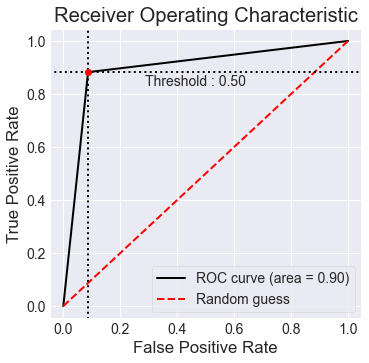

In [39]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, ypred_rf, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [35]:
# What features contribute the most?
features_importances = pd.DataFrame({'Features': X_train.columns, 
                                     'Score':rf.feature_importances_}).sort_values(by = 'Score', ascending = False)
features_importances.head()

,Features,Score
0,age,0.127528
11,caa,0.126944
2,cp,0.121332
9,oldpeak,0.117046
7,thalachh,0.113546


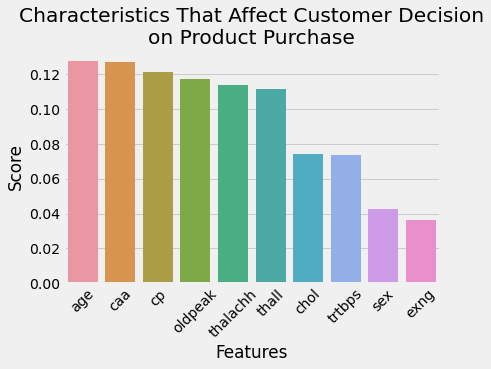

In [36]:
sns.barplot(x = 'Features', y ='Score', data = features_importances[:10]);
plt.xticks(rotation = 45)
plt.title('Characteristics That Affect Customer Decision\non Product Purchase');

## Support Vector Classifier

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        23
           1       0.89      0.91      0.90        34

    accuracy                           0.88        57
   macro avg       0.87      0.87      0.87        57
weighted avg       0.88      0.88      0.88        57



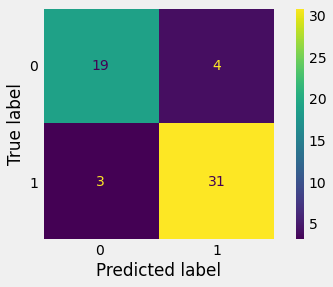

In [37]:
print(classification_report(y_test, ypred_svm))
plot_confusion_matrix(estimator=svm, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

Dari hasil menggunakan Support Vector Classifier bisa dilihat **False Negative** sudah cukup baik, dengan **recall 1** mencapai 0.91 dan **precision 0** mencapai 0.86

In [37]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

y_test_pred2 = svc.predict(X_test)
y_train_pred2=svc.predict(X_train)

svc_acc=accuracy_score(y_test_pred2,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred2,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred2,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred2,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred2,y_test))

Train Set Accuracy:92.3529411764706
Test Set Accuracy:85.96491228070175

Confusion Matrix:
[[18  3]
 [ 5 31]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        21
           1       0.91      0.86      0.89        36

    accuracy                           0.86        57
   macro avg       0.85      0.86      0.85        57
weighted avg       0.86      0.86      0.86        57



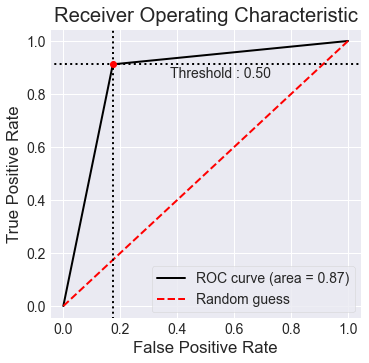

In [40]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, ypred_svm, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

### Logistic Regression

              precision    recall  f1-score   support

           0       0.84      0.91      0.87        23
           1       0.94      0.88      0.91        34

    accuracy                           0.89        57
   macro avg       0.89      0.90      0.89        57
weighted avg       0.90      0.89      0.90        57



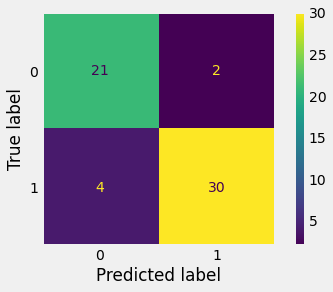

In [39]:
print(classification_report(y_test, ypred_lr))
plot_confusion_matrix(estimator=lr, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

Dari hasil menggunakan model Logistic Regression bisa dilihat bahwa **False Negative** juga cukup baik, dengan score **recall 1** sebesar 0.88 dan **precision 0** sebesar 0.84

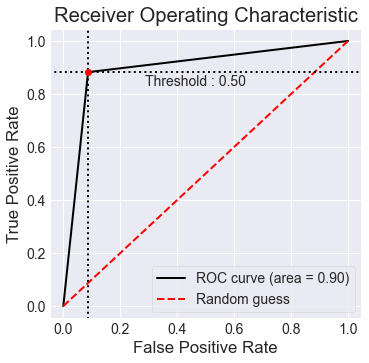

In [41]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, ypred_lr, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

### Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.75      0.91      0.82        23
           1       0.93      0.79      0.86        34

    accuracy                           0.84        57
   macro avg       0.84      0.85      0.84        57
weighted avg       0.86      0.84      0.84        57



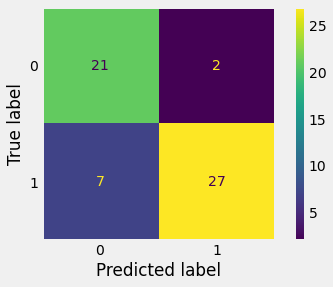

In [40]:
print(classification_report(y_test, ypred_dt))
plot_confusion_matrix(estimator=dt, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

Dari hasil modelling menggunakan Decision Tree Classifier bisa dilihat **False Negative** lebih rendah dari pada yang lain, dengan **Recall 1** menurun di 0.79 dan **precision 0** di 0.75

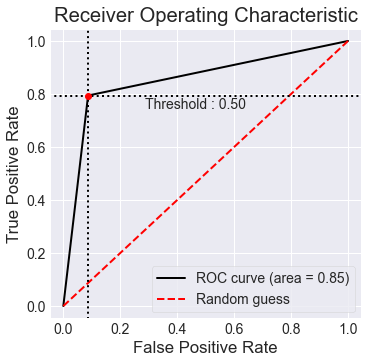

In [42]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, ypred_dt, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [43]:
# What features contribute the most?
features_importances = pd.DataFrame({'Features': X_train.columns, 'Score':dt.feature_importances_}).sort_values(by = 'Score', ascending = False)
features_importances.head()

,Features,Score
11,caa,0.274280
12,thall,0.119109
7,thalachh,0.118226
0,age,0.114535
2,cp,0.100203


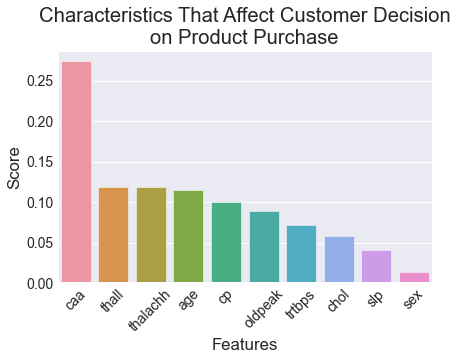

In [44]:
sns.barplot(x = 'Features', y ='Score', data = features_importances[:10]);
plt.xticks(rotation = 45)
plt.title('Characteristics That Affect Customer Decision\non Product Purchase');

### KNN

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        23
           1       0.93      0.82      0.87        34

    accuracy                           0.86        57
   macro avg       0.86      0.87      0.86        57
weighted avg       0.87      0.86      0.86        57



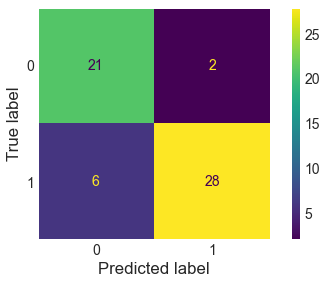

In [45]:
print(classification_report(y_test, ypred_knn))
plot_confusion_matrix(estimator=knn, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

Dari hasil modelling menggunakan KNN, dapat dilihat bahwa **False Negative** juga begitu rendah seperti Decision Tree dengan score **Recall 1** sebesar 0.82, dan **precision 1** sebesar 0.78

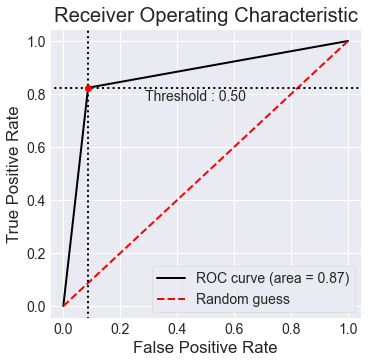

In [46]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, ypred_knn, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

### Naive Bayes

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        23
           1       0.88      0.85      0.87        34

    accuracy                           0.84        57
   macro avg       0.84      0.84      0.84        57
weighted avg       0.84      0.84      0.84        57



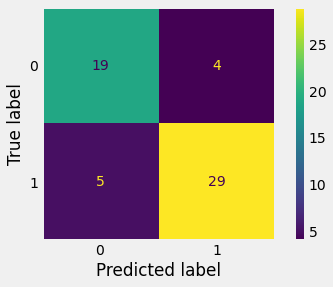

In [44]:
print(classification_report(y_test, ypred_nb))
plot_confusion_matrix(estimator=nb, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

Dari hasil modelling menggunakan Naive Bayes ini **False Negative** cukup baik dengan nilai **Recall 1** sebesar 0.85 dan **precision 0** sebesar 0.79

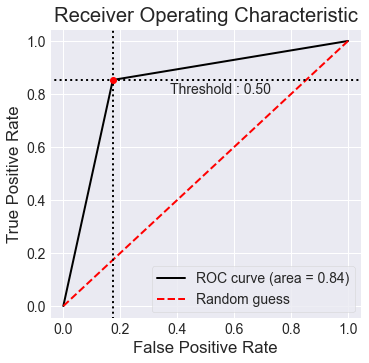

In [47]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, ypred_nb, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

### Hasil Modelling
Berdasarkan hasil dari berbagai modelling dapat dilihat ada 4 yang sudah baik dalam klasifikasi :

1) XGBOOST Classifier

2) Random Forest Classifier

3) Logistic Regression

4) Support Vector Classifier

## Hyperparameter Tuning

In [48]:
model_params = {
    'svm': {
        'model': SVC(),
        'params' : {
            'C' : [1.0, 2.0, 4.0, 6.0, 8.0, 10.0],
            'kernel': ['rbf'],
            'gamma' : ['scale', 'auto']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [i for i in range(1,100,5)],
            'criterion' : ['gini', 'entropy'],
            'max_features' : ['auto', 'sqrt', 'log2'],
            'n_jobs' : [-1]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
            'C': [1.0, 2.0, 4.0, 6.0, 8.0, 10.0],
            'penalty' : ['l1', 'l2', 'elasticnet'],
            'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'multi_class' : ['auto', 'ovr', 'multinomial'],
            'n_jobs' : [-1]
        }
    }
}

In [49]:
#import gridsearch
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train_sm, y_train_sm)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_param = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_param

,model,best_score,best_params
0,svm,0.816282,"{'C': 1.0, 'gamma': 'auto', 'kernel': 'rbf'}"
1,random_forest,0.842179,"{'criterion': 'entropy', 'max_features': 'sqrt..."
2,logistic_regression,0.826923,"{'C': 1.0, 'multi_class': 'auto', 'n_jobs': -1..."


In [50]:
df_param['best_params'][1]

{'criterion': 'entropy',
 'max_features': 'sqrt',
 'n_estimators': 91,
 'n_jobs': -1}

In [51]:
model = RandomForestClassifier(criterion='entropy', max_features='sqrt', n_estimators=91, n_jobs=-1)

In [52]:
model.fit(X_train_sm, y_train_sm)

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=91, n_jobs=-1)

In [53]:
y_test_pred_model = model.predict(X_test)
y_train_pred_model=model.predict(X_train_sm)

modelrfc_acc=accuracy_score(y_test_pred_model,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred_model,y_train_sm)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred_model,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred_model,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred_model,y_test))

Train Set Accuracy:100.0
Test Set Accuracy:89.47368421052632

Confusion Matrix:
[[21  4]
 [ 2 30]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.84      0.87        25
           1       0.88      0.94      0.91        32

    accuracy                           0.89        57
   macro avg       0.90      0.89      0.89        57
weighted avg       0.90      0.89      0.89        57



In [58]:
from sklearn.model_selection import GridSearchCV, KFold
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}

gs2 = GridSearchCV(XGBClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=3), scoring='roc_auc')
gs2.fit(X_train_sm, y_train_sm)

print('Best score:', gs2.best_score_)
print('Best score:', gs2.best_params_)

[19:41:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best score: 0.9008399182817787
Best score: {'base_score': 0.2, 'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.1, 'n_estimators': 200, 'reg_alpha': 1, 'reg_lambda': 5}


In [59]:
from xgboost import XGBClassifier

model3 = XGBClassifier(base_score = 0.2, booster = 'gbtree', gamma = 0, learning_rate = 0.1, 
                       n_estimators = 200, reg_alpha = 1, reg_lambda = 5, random_state=42)
model3.fit(X_train_sm, y_train_sm)
y_train_hat2 = model3.predict(X_train_sm)
y_test_hat2 = model3.predict(X_test)

print(model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train_sm, y_train_hat2))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat2))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat2))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat2))

[19:41:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=91, n_jobs=-1)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        98
           1       0.99      1.00      0.99        98

    accuracy                           0.99       196
   macro avg       0.99      0.99      0.99       196
weighted avg       0.99      0.99      0.99       196

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.96      0.94  

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        23
           1       0.97      0.94      0.96        34

    accuracy                           0.95        57
   macro avg       0.94      0.95      0.95        57
weighted avg       0.95      0.95      0.95        57



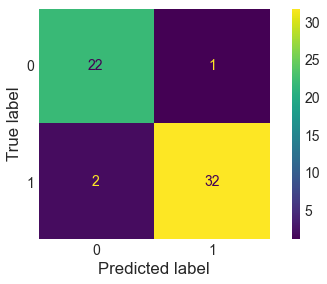

In [60]:
print(classification_report(y_test, y_test_hat2))

plot_confusion_matrix(estimator=model3, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

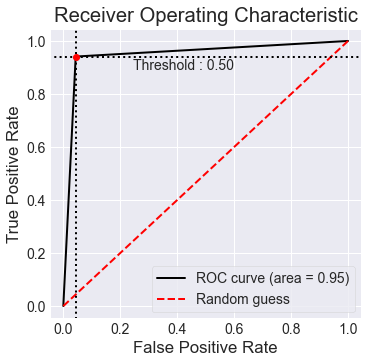

In [61]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_test_hat2, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

## Kesimpulan Akhir
Dengan menggunakan hyperparameter pada Random Forest dan juga XGBOOST Classifier, untuk Random Forest tidak ada perubahan signifikan, namun untuk XGBOOST dengan hyperparamater bisa meningkatkan nilai **recall 1** sebesar 0.94 dan juga **precision 0** sebesar 0.92.

Untuk itu, model yang bisa dipakai adalah XGBOOST Classifier dengan hyperparameter 
### XGBOOST Classifier